In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat

In [146]:
datos = pd.read_csv("eval_petro.csv")

In [147]:
datos.head()

PROF       GR       DLL       LLS       FR  DT    NPHI    RHOB       M
0  3895.4964  13.4288  296.4435  152.3448  73.8266 NaN  0.0606  2.5407  0.8381
1  3895.6488  13.5247  306.2799  155.8916  68.3078 NaN  0.0633  2.5486  0.8332
2  3895.8012  13.4533  305.2768  154.7796  68.0374 NaN  0.0645  2.5578  0.8301
3  3895.9536  12.8354  297.0194  150.2632  71.7124 NaN  0.0652  2.5606  0.8290
4  3896.1060  11.6641  283.1093  142.4204  77.3886 NaN  0.0683  2.5554  0.8278

In [148]:
datos['PROF'].head()

0    3895.4964
1    3895.6488
2    3895.8012
3    3895.9536
4    3896.1060
Name: PROF, dtype: float64

In [149]:
datos['DT'] = 189 - (datos['RHOB'] -1)*datos['M']/0.01

In [150]:
#datos['DT']

In [151]:
#datos

In [152]:
datos['N'] = (1 - datos['NPHI'])/(datos['RHOB'] - 1)

In [153]:
datos.head()

PROF       GR       DLL       LLS       FR         DT    NPHI    RHOB  \
0  3895.4964  13.4288  296.4435  152.3448  73.8266  59.873933  0.0606  2.5407   
1  3895.6488  13.5247  306.2799  155.8916  68.3078  59.970648  0.0633  2.5486   
2  3895.8012  13.4533  305.2768  154.7796  68.0374  59.687022  0.0645  2.5578   
3  3895.9536  12.8354  297.0194  150.2632  71.7124  59.626260  0.0652  2.5606   
4  3896.1060  11.6641  283.1093  142.4204  77.3886  60.243988  0.0683  2.5554   

        M         N  
0  0.8381  0.609723  
1  0.8332  0.604869  
2  0.8301  0.600526  
3  0.8290  0.599000  
4  0.8278  0.599010

In [154]:
datos['L'] = (189 - datos['DT'])/(1-datos['NPHI'])

In [155]:
#datos['L']

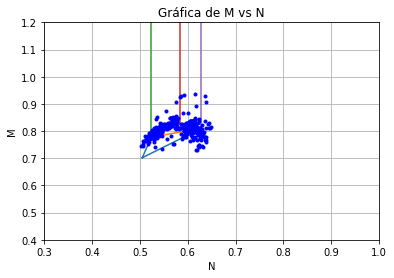

In [156]:
P_inicial=[0.5051,0.5241,0.5848,0.6273,0.6273,0.5051]
P_final  =[0.702,0.7781,0.8269,0.8091,0.8091,0.702]
P_M1=[0.5241,0.6273]
P_M2=[0.7781,0.8091]
v_x1=[0.5241,0.5241]
v_y1=[0.7781,1.2]
v_x2=[0.5848,0.5848]
v_y2=[0.8269,1.2]
v_x3=[0.6273,0.6273]
v_y3=[0.8091,1.2]
plt.plot(P_inicial,P_final,P_M1,P_M2,v_x1,v_y1,v_x2,v_y2,v_x3,v_y3)
plt.plot(datos['N'],datos['M'],marker='.', linestyle='', color='b', label = "M vs N")
#plt.scatter(datos['N'],datos['M'])

#plt.xlim([0.5,0.65])
#plt.ylim([0.7,0.95])
plt.xlim([0.3,1])
plt.ylim([0.4,1.2])
plt.grid()
plt.xlabel('N')
plt.ylabel('M')
plt.title('Gráfica de M vs N')
plt.show()

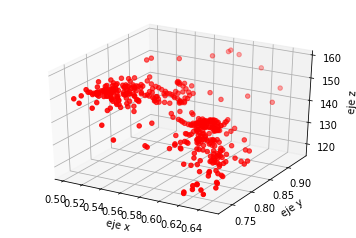

In [157]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = datos['N']
Y = datos['M']
Z = datos['L']

ax.scatter(X,Y,Z, c='r',marker = 'o')
#Axes3D.plot(xs = datos['N'], ys = datos['M'], zs = datos['L'] , zdir = 'z')
ax.set_xlabel('eje x')
ax.set_ylabel('eje y')
ax.set_zlabel('eje z')
plt.show()

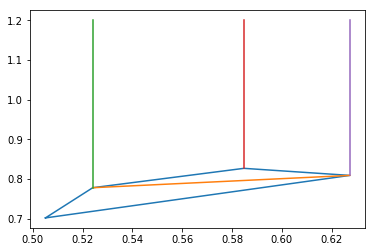

In [158]:
plt.plot(P_inicial,P_final)
plt.plot(P_M1,P_M2)
plt.plot(v_x1,v_y1,v_x2,v_y2,v_x3,v_y3)

##### Vamos a ver como podemos graficar con puntos mas precisos

In [159]:
DOLOMIA = np.array([43.5, 2.87, 0.02])
CALIZA  = np.array([47.6, 2.71, 0.00])
SILICE  = np.array([55.5, 2.65, -0.035])
ARCILLA = np.array([120,  2.35, 0.33])

def param_lito(mineral):
    M = 0.01 * (189-mineral[0])/(mineral[1] - 1)
    N = (1 - mineral[2]) / (mineral[1] - 1)
    L = 0.01 * (189 - mineral[0])/(1 - mineral[2])
    return    np.array([M,N,L])

param_lito(DOLOMIA)
param_lito(CALIZA)
param_lito(SILICE)
param_lito(ARCILLA)

ax = param_lito(DOLOMIA)[1]
ay = param_lito(DOLOMIA)[0]
bx = param_lito(CALIZA)[1]
by = param_lito(CALIZA)[0]
cx = param_lito(SILICE)[1]
cy = param_lito(SILICE)[0]
dx = param_lito(ARCILLA)[1]
dy = param_lito(ARCILLA)[0]
ax,ay
bx,by
cx,cy
dx,dy

(0.49629629629629624, 0.5111111111111111)

In [160]:
#P_inicial=[0.5051,0.5241,0.5848,0.6273,0.6273,0.5051]
P_inicial=[ax,bx,cx,dx,ax]
#P_final  =[0.702,0.7781,0.8269,0.8091,0.8091,0.702]
P_final  =[ay,by,cy,dy,ay]

P_inicial=[ax,bx,cx,dx,ax]
P_final  =[ay,by,cy,dy,ay]
P_M1=[ax,cx]
P_M2=[ay,cy]
v_x1=[ax,ax]
v_y1=[ay,1.2]
v_x2=[bx,bx]
v_y2=[by,1.2]
v_x3=[cx,cx]
v_y3=[cy,1.2]

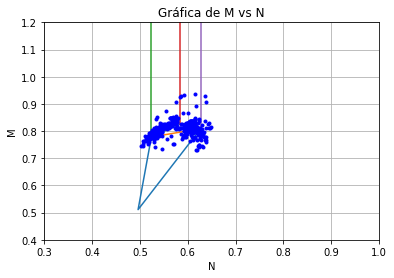

In [161]:
plt.plot(P_inicial,P_final,P_M1,P_M2,v_x1,v_y1,v_x2,v_y2,v_x3,v_y3)
plt.plot(datos['N'],datos['M'],marker='.', linestyle='', color='b', label = "M vs N")
#plt.scatter(datos['N'],datos['M'])

#plt.xlim([0.5,0.65])
#plt.ylim([0.7,0.95])
plt.xlim([0.3,1])
plt.ylim([0.4,1.2])
plt.grid()
plt.xlabel('N')
plt.ylabel('M')
plt.title('Gráfica de M vs N')
plt.show()

In [163]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

#vertices del poligono
DOL_CAL_SIL_FIP = Polygon([(ax, ay), (bx , by), (cx , cy), (ax, ay)])
DOL_SIL_ARC_FIP = Polygon([(ax, ay), (cx , cy), (dx , dy), (ax, ay)])
DOL_CAL_FIP_FIS = Polygon([(ax, ay), (bx , by), (bx , 1.2), (ax, 1.2), (ax ,ay)])
CAL_SIL_FIP_FIS = Polygon([(bx, by), (cx , cy), (cx , 1.2), (bx ,1.2), (bx, by)])


"""definicion de los datos, conversion de datos de serie a numericos tipo array"""
M = np.array(datos['M'])
N = np.array(datos['N'])

#algoritmo para decidir si un punto esta dentro del poligono
i = 0
puntos = []

for numero in M:
    point = Point(N[i],M[i])
    buleano = DOL_CAL_SIL_FIP.contains(point)
    
    if buleano == True:
        puntos.append('DOL_CAL_SIL_FIP')
        
    else:
        buleano = DOL_SIL_ARC_FIP.contains(point)
        
        if buleano == True:
            puntos.append('DOL_SIL_ARC_FIP')
    
        else:
            buleano = DOL_CAL_FIP_FIS.contains(point)
    
            if buleano == True:
                puntos.append('DOL_CAL_FIP_FIS')
        
            else:
                buleano = CAL_SIL_FIP_FIS.contains(point)
        
                if buleano == True:
                    puntos.append('CAL_SIL_FIP_FIS')
                else: 
                    puntos.append('null')
    i += 1

In [164]:
datos['Porosidad'] = puntos
#a = np.array([puntos])

In [165]:
datos['Porosidad']
#a.shape

0      CAL_SIL_FIP_FIS
1      CAL_SIL_FIP_FIS
2      CAL_SIL_FIP_FIS
3      CAL_SIL_FIP_FIS
4      CAL_SIL_FIP_FIS
5      CAL_SIL_FIP_FIS
6      CAL_SIL_FIP_FIS
7      DOL_CAL_SIL_FIP
8      DOL_CAL_SIL_FIP
9      DOL_CAL_SIL_FIP
10     DOL_CAL_SIL_FIP
11     DOL_CAL_SIL_FIP
12     DOL_CAL_SIL_FIP
13     DOL_CAL_SIL_FIP
14     DOL_CAL_SIL_FIP
15     DOL_CAL_SIL_FIP
16     DOL_CAL_SIL_FIP
17     DOL_CAL_SIL_FIP
18     DOL_CAL_SIL_FIP
19     DOL_CAL_SIL_FIP
20     DOL_CAL_SIL_FIP
21     CAL_SIL_FIP_FIS
22     CAL_SIL_FIP_FIS
23     CAL_SIL_FIP_FIS
24     CAL_SIL_FIP_FIS
25     DOL_CAL_SIL_FIP
26     DOL_CAL_SIL_FIP
27     DOL_CAL_SIL_FIP
28     DOL_CAL_SIL_FIP
29     DOL_CAL_SIL_FIP
            ...       
370               null
371               null
372    DOL_CAL_FIP_FIS
373               null
374               null
375               null
376    DOL_CAL_FIP_FIS
377    DOL_CAL_FIP_FIS
378    DOL_CAL_FIP_FIS
379    DOL_CAL_FIP_FIS
380    DOL_CAL_SIL_FIP
381    DOL_SIL_ARC_FIP
382    DOL_

In [166]:
#manipulacion de datos como arreglos
PROF = np.array(datos['PROF'])
GR   = np.array(datos['GR'])
LLS  = np.array(datos['LLS'])
FR   = np.array(datos['FR'])
DT   = np.array(datos['DT'])
NPHI = np.array(datos['NPHI'])
RHOB = np.array(datos['RHOB'])
M    = np.array(datos['M'])
N    = np.array(datos['N'])
L    = np.array(datos['L'])
Porosidad = np.array(datos['Porosidad'])
#print(datos)
datos.head()

PROF       GR       DLL       LLS       FR         DT    NPHI    RHOB  \
0  3895.4964  13.4288  296.4435  152.3448  73.8266  59.873933  0.0606  2.5407   
1  3895.6488  13.5247  306.2799  155.8916  68.3078  59.970648  0.0633  2.5486   
2  3895.8012  13.4533  305.2768  154.7796  68.0374  59.687022  0.0645  2.5578   
3  3895.9536  12.8354  297.0194  150.2632  71.7124  59.626260  0.0652  2.5606   
4  3896.1060  11.6641  283.1093  142.4204  77.3886  60.243988  0.0683  2.5554   

        M         N           L        Porosidad  
0  0.8381  0.609723  137.455894  CAL_SIL_FIP_FIS  
1  0.8332  0.604869  137.748854  CAL_SIL_FIP_FIS  
2  0.8301  0.600526  138.228731  CAL_SIL_FIP_FIS  
3  0.8290  0.599000  138.397240  CAL_SIL_FIP_FIS  
4  0.8278  0.599010  138.194711  CAL_SIL_FIP_FIS

In [208]:
b = np.matrix([ DT[0],
                NPHI[0],
                RHOB[0],
                [1] ])
b

matrix([[59.873933],
        [ 0.0606  ],
        [ 2.5407  ],
        [ 1.      ]])

In [211]:
A = np.matrix([ [189, 43.5, 55.5,   120],
                [1.0, 0.02, -0.035, 0.33],
                [1.0, 2.87, 2.65,   2.35],
                [1.0, 1.0,  1.0,    1.0]    ])
A.shape
A_inverse = np.linalg.inv(A)
X = A_inverse * b
FIP  =  X[0]
VDOL =  X[1]
VSIL =  X[2]
VARC =  X[3]

In [168]:
# define matrix A using Numpy arrays
A = np.matrix([ [189, 43.5, 55.5,   120],
                [1.0, 0.02, -0.035, 0.33],
                [1.0, 2.87, 2.65,   2.35],
                [1.0, 1.0,  1.0,    1.0]    ])
A.shape
#define matrix B
b = np.matrix([ [DT],
                [NPHI],
                [RHOB],
                [1] ])
A_inverse = np.linalg.inv(A)
X = A_inverse * b
FIP  =  X[0]
VDOL =  X[1]
VSIL =  X[2]
VARC =  X[3]


#La idea de poner 2 shape es para que el arreglo quede de tamaño (400,1)
#hasta el momento no he encontrado como optimizar este detalle
FIP = np.array(FIP.T)[0]
FIP.shape
FIP = np.array(FIP.T)[0]
FIP.shape

VDOL = np.array(VDOL.T)[0]
VDOL.shape
VDOL = np.array(VDOL.T)[0]
VDOL.shape

VSIL = np.array(VSIL.T)[0]
VSIL.shape
VSIL = np.array(VSIL.T)[0]
VSIL.shape

VARC = np.array(VARC.T)[0]
VARC.shape
VARC = np.array(VARC.T)[0]
VARC.shape

VCAL = np.array(VARC*0.0000)


In [196]:
r1 = str("DOL_CAL_SIL_FIP")
r2 = str("DOL_SIL_ARC_FIP")
r3 = str("DOL_CAL_FIP_FIS")
r4 = str("CAL_SIL_FIP_FIS")

matrizA = np.array([])
for area in Porosidad:
    if area == r1:
        A = np.array([ [189, 43.5, 47.6,   55.5],
                        [1.0, 0.02, 0.00, -0.035],
                        [1.0, 2.87, 2.71,   2.65],
                        [1.0, 1.0,  1.0,    1.0 ]])        
        matrizA = np.append(matrizA, A, axis = 2)
        
    else:
        if area == r2:
            A = np.array([ [189, 43.5, 55.5,   120],
                            [1.0, 0.02, -0.035, 0.33],
                            [1.0, 2.87, 2.65,   2.35],
                            [1.0, 1.0,  1.0,    1.0]    ])
            matrizA = np.append(matrizA, A, axis = 2)
            
        else:
            if area == r3:
                A = np.array([ [189, 45.55, 43.5,  47.6],
                                [1.0, 1.0,   0.02,   0.0],
                                [1.0, 1.0,   2.87,   2.71],
                                [1.0, 1.0,    1.0,   1.0]    ])
                matrizA = np.append(matrizA, A, axis = 2)
                
            else:
                if area == r4:
                    A = np.array([ [189, 51.55, 47.6,   55.5],
                                    [1.0, 1.0, 0.0, -0.035],
                                    [1.0, 1.0, 2.71,   2.65],
                                    [1.0, 1.0,  1.0,    1.0]    ])
                    matrizA = np.append(matrizA, A, axis = 2)
                        
                else:
                    matrzA =np.append(matrizA, 0)
matrizA


AxisError: axis 2 is out of bounds for array of dimension 1

In [192]:
len(matrizA)

4928

In [ ]:
#datos.to_csv('eval_petro_output.csv') #exportando al archivo csv
r1 = str("DOL_CAL_SIL_FIP")
r2 = str("DOL_SIL_ARC_FIP")
r3 = str("DOL_CAL_FIP_FIS")
r4 = str("CAL_SIL_FIP_FIS")

matrizA = np.array([])
for area in Porosidad:
    if area == r1:
        calculo_r1
        
    else:
        if area == r2:
            calculo_r2
            
        else:
            if area == r3:
                calculo_r3
                
            else:
                if area == r4:
                    calculo_r4
                        
                else:
                    matrzA =np.append(matrizA, 0)
matrizA


In [214]:
FIP = np.array([])
VDOL = np.array([])
VCAL = np.array([])
VSIL = np.array([])
VARC = np.array([])
FIS = np.array([])

matrizA = np.array([])
for area in Porosidad:

    i = 0
    if area == r1:
        A = np.array([ [189, 43.5, 47.5,   55.5],
                        [1.0, 0.02, 0.0, -0.035],
                        [1.0, 2.87, 2.71,   2.65],
                        [1.0, 1.0,  1.0,    1.0]    ])
        A.shape

        #define matrix B
        b = np.array([ DT[i],
                        NPHI[i],
                        RHOB[i],
                        1 ])
        # b = np.array([73.9477, 0.1275, 2.6503, 1])
        B = np.array([59.8739, 0.0606, 2.5407, 1])
        X = np.around(np.linalg.solve(A, b), decimals = 4)
        #datos.head()
        A_inverse = np.linalg.inv(A)
        # X = A_inverse * b
        FIP  = np.append(FIP, [X[0]], axis=0)
        VDOL = np.append(VDOL,[X[1]], axis=0)
        VSIL = np.append(VSIL,[X[3]], axis=0)
        VARC = np.append(VARC,[0], axis=0)
        VCAL = np.append(VCAL,[X[2]], axis=0)
        FIS  = np.append(FIS, [0], axis=0)


    else:
        if area == r2:
            A = np.array([ [189, 43.5, 55.5,   120],
                            [1.0, 0.02, -0.035, 0.33],
                            [1.0, 2.87, 2.65,   2.35],
                            [1.0, 1.0,  1.0,    1.0]    ])
            A.shape

            #define matrix B
            b = np.array([ DT[i],
                            NPHI[i],
                            RHOB[i],
                            1 ])
            # b = np.array([73.9477, 0.1275, 2.6503, 1])
            B = np.array([59.8739, 0.0606, 2.5407, 1])
            X = np.around(np.linalg.solve(A, b), decimals = 4)
            #datos.head()
            A_inverse = np.linalg.inv(A)
            # X = A_inverse * b
            FIP = np.append(FIP,[X[0]], axis=0)
            VDOL = np.append(VDOL,[X[1]], axis=0)
            VSIL = np.append(VSIL,[X[2]], axis=0)
            VARC = np.append(VARC,[X[3]], axis=0)
            VCAL = np.append(VCAL,[0], axis=0)
            FIS = np.append(FIS,[0], axis=0)



        else:
            if area == r3:
                A = np.matrix([ [189, 45.55, 43.5, 47.6],
                                [1.0, 1.0, 0.02,    0.0],
                                [1.0, 1.0, 2.87,   2.71],
                                [1.0, 1.0,  1.0,    1.0]    ])
                A.shape

                #define matrix B
                b = np.array([ DT[i],
                                NPHI[i],
                                RHOB[i],
                                1 ])
                # b = np.array([73.9477, 0.1275, 2.6503, 1])
                B = np.array([59.8739, 0.0606, 2.5407, 1])
                X = np.around(np.linalg.solve(A, b), decimals = 4)
                #datos.head()
                A_inverse = np.linalg.inv(A)
                # X = A_inverse * b
                FIP = np.append(FIP,[X[0]], axis=0)
                VDOL = np.append(VDOL,[X[2]], axis=0)
                VSIL = np.append(VSIL,[0], axis=0)
                VARC = np.append(VARC,[0], axis=0)
                VCAL = np.append(VCAL,[X[3]], axis=0)
                FIS = np.append(FIS,[X[1]], axis=0)



            else:
                if area == r4:
                    A = np.array([  [189, 51.55, 47.6, 55.5],
                                    [1.0, 1.0,  0.0, -0.035],
                                    [1.0, 1.0, 2.71,   2.65],
                                    [1.0, 1.0,  1.0,    1.0]    ])
                    A.shape

                    #define matrix B
                    b = np.array([ DT[i],
                                    NPHI[i],
                                    RHOB[i],
                                    1 ])
                    # b = np.array([73.9477, 0.1275, 2.6503, 1])
                    B = np.array([59.8739, 0.0606, 2.5407, 1])
                    X = np.around(np.linalg.solve(A, b), decimals = 4)
                    #datos.head()
                    A_inverse = np.linalg.inv(A)
                    # X = A_inverse * b
                    FIP = np.append(FIP,[X[0]], axis=0)
                    VDOL = np.append(VDOL,[0], axis=0)
                    VSIL = np.append(VSIL,[X[3]], axis=0)
                    VARC = np.append(VARC,[0], axis=0)
                    VCAL = np.append(VCAL,[X[2]], axis=0)
                    FIS = np.append(FIS,[X[1]], axis=0)

                else:
                    FIP = np.append(FIP,[np.NaN], axis=0)
                    VDOL = np.append(VDOL,[np.NaN], axis=0)
                    VSIL = np.append(VSIL,[np.NaN], axis=0)
                    VARC = np.append(VARC,[np.NaN], axis=0)
                    VCAL = np.append(VCAL,[np.NaN], axis=0)
                    FIS = np.append(FIS,[np.NaN], axis=0)
    i += 1

FIS.shape
datos['VDOL'] = np.around(VDOL,decimals = 4)
datos['VCAL'] = np.around(VCAL,decimals = 4)
datos['VSIL'] = np.around(VSIL,decimals = 4)
datos['VARC'] = np.around(VARC,decimals = 4)
datos['FIS']  = np.around(FIS, decimals = 4)
datos['FIP']  = np.around(FIP, decimals = 4)
VDOL[67]+ VCAL[67] +VSIL[67]+VARC[67]+FIS[67]+FIP[67]
plt.plot(VDOL,-1*PROF)
datos


TypeError: No loop matching the specified signature and casting
was found for ufunc solve1